In [182]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("drug-use-by-age.csv", na_values="-")

In [163]:
#calculando a media das colunas "frequency"
frequency_mask = [column for column in df.columns if "frequency" in column]

freq_multiplied = df[frequency_mask].multiply(df['n'], axis=0)
n_total = df["n"].sum()

fmean = freq_multiplied.sum() / n_total

In [164]:
# calculando moda e mediana
dfs_duplicated = []

for i in range(17):
    row = df[frequency_mask].iloc[i,]    
    df_dup = pd.DataFrame([row] * df.iloc[i, 1], columns=row.index)
    dfs_duplicated.append(df_dup)

df_stacked = pd.concat(dfs_duplicated , ignore_index=True)

fmedian = df_stacked.median()
fmode = df_stacked.mode()

## Interpretando medidas de centralidade e dispersão

As colunas "frequency" representam o consumo médio de cada substância relativo as diferentes idades, oque pode ser um pequeno viés para a analise dos dados ja que o ideal seria ter o consumo exato de cada substância para cada individuo que apresentou seus dados

Para calcular a media foi necessário multiplicar o valor de cada coluna "frequency" pelo tamanho da amostra (valores da coluna n), acumular os resultados de cada coluna e dividir pela total de amostras. <br>
Ou seja a coluna Média é a média total de consumo de cada susbtância em relação aos individuos de todas as idades

Para calcular a moda e mediana cada tupla das colunas "frequency" foi duplicada n vezes de acordo com o tamanho de n de cada idade, por exemplo: Os valores relativos a idade de 12 anos foram duplicadas 2798 vezes. <br>

In [171]:
# media e mediana
central_tendency = pd.DataFrame({
    "Média" : round(fmean, 2),
    "Moda" : fmode.iloc[0],
    "Mediana" : fmedian
})
central_tendency

,Média,Moda,Mediana
alcohol_frequency,35.86,52.0,52.0
marijuana_frequency,43.88,52.0,52.0
cocaine_frequency,8.58,5.0,5.5
crack_frequency,16.13,48.0,9.5
heroin_frequency,85.25,280.0,57.5
hallucinogen_frequency,8.46,3.0,3.0
inhalant_frequency,6.22,4.0,4.0
pain_releiver_frequency,14.41,12.0,12.0
oxycontin_frequency,14.04,12.0,12.0
tranquilizer_frequency,11.29,10.0,10.0


In [173]:
var = df_stacked.var(ddof=1)
dep = df_stacked.std(ddof=1)

dispersion = pd.DataFrame({
    "Variancia" : var,
    "Desvio Padrão" : dep
})

dispersion

,Variancia,Desvio Padrão
alcohol_frequency,418.687678,20.461859
marijuana_frequency,283.126661,16.826368
cocaine_frequency,71.646395,8.464419
crack_frequency,400.805091,20.020117
heroin_frequency,7279.115438,85.317732
hallucinogen_frequency,211.863664,14.555537
inhalant_frequency,21.548143,4.641998
pain_releiver_frequency,39.295759,6.268633
oxycontin_frequency,135.007095,11.619255
tranquilizer_frequency,108.621612,10.422169


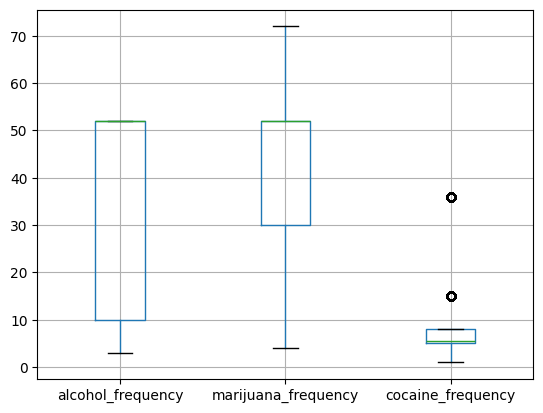

In [188]:
df_stacked.boxplot(column=["alcohol_frequency", "marijuana_frequency", "cocaine_frequency"])
plt.show()

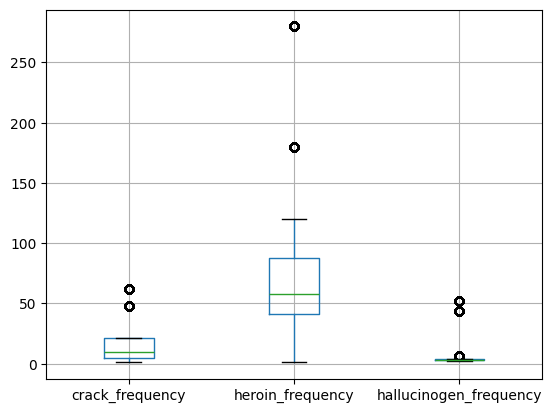

In [190]:
df_stacked.boxplot(column= ["crack_frequency","heroin_frequency","hallucinogen_frequency"])
plt.show()

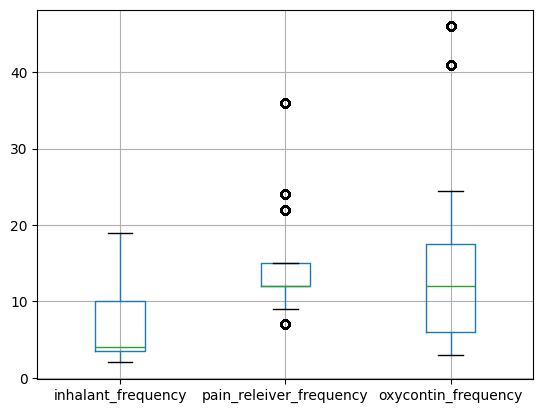

In [192]:
df_stacked.boxplot(column= ["inhalant_frequency","pain_releiver_frequency","oxycontin_frequency"])
plt.show()

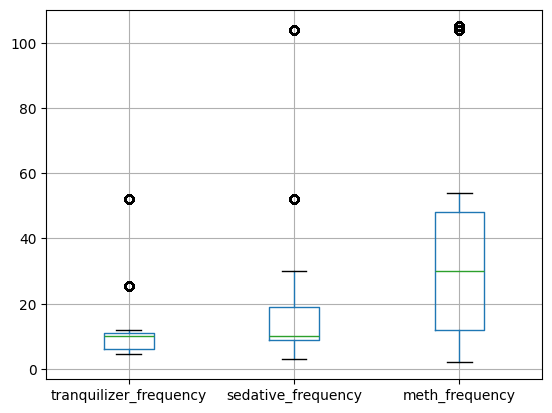

In [194]:
df_stacked.boxplot(column= ["tranquilizer_frequency","sedative_frequency","meth_frequency"])
plt.show()